In [26]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [21]:
# Direktori Input untuk Data Preprocessed
PROC_TRAIN = "../data/processed/Train"

In [22]:
# Model Conv2D (alternatif) untuk perbandingan
def build_conv2d_model(input_shape=(224, 224, 3), num_classes=2):
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Output layer
    ])
    
    model.compile(optimizer='adamW', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [23]:
# Fungsi untuk mempersiapkan generator
def prepare_data():
    train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rotasi gambar
    width_shift_range=0.2,  # Geser lebar gambar
    height_shift_range=0.2,  # Geser tinggi gambar
    shear_range=0.2,
    zoom_range=0.2,  # Zoom gambar
    horizontal_flip=True,  # Pembalikan gambar secara horizontal
    fill_mode='nearest'  # Isi area kosong dengan piksel terdekat
    )   

    train_generator = train_datagen.flow_from_directory(
        PROC_TRAIN,
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse'
    )
    
    return train_generator

In [25]:
# Menyusun dan melatih model Conv2D
train_generator = prepare_data()

# Membuat model Conv2D
conv2d_model = build_conv2d_model(input_shape=(224, 224, 3), num_classes=len(os.listdir(PROC_TRAIN)))

# Membuat Model Checkpoint untuk menyimpan model terbaik
checkpoint = ModelCheckpoint(
    'conv2d_best_model.h5', 
    monitor='accuracy', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)

Found 267 images belonging to 70 classes.


c:\Users\ihyar\OneDrive\Documents\Semester-7\Project-DeepLearning\.deepL\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Melatih model Conv2D
conv2d_history = conv2d_model.fit(
    train_generator,
    epochs=10,
    callbacks=[checkpoint]
)

# Menyimpan model Conv2D dalam format .h5
conv2d_model.save('conv2d_final_model.h5')

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.0027 - loss: 5.3579
Epoch 1: accuracy improved from None to 0.00375, saving model to conv2d_best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 962ms/step - accuracy: 0.0037 - loss: 4.9821
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 953ms/step - accuracy: 0.0039 - loss: 4.2700
Epoch 2: accuracy improved from 0.00375 to 0.01124, saving model to conv2d_best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.0112 - loss: 4.2697   
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0244 - loss: 4.2454
Epoch 3: accuracy did not improve from 0.01124
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0112 - loss: 4.2513
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0071 - loss: 4.2455
Epoch 4: accuracy improved from 0.01124 to 0.02247, saving model to conv2d_best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0225 - loss: 4.2445
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0176 - loss: 4.2360 
Epoch 5: accuracy did not improve from 0.02247
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.0225 - loss: 4.2495
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 973ms/step - accuracy: 0.0168 - loss: 4.2198
Epoch 6: accuracy improved from 0.02247 to 0.02622, saving model to conv2d_best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0262 - loss: 4.2065  
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 990ms/step - accuracy: 0.0428 - loss: 4.1690
Epoch 7: accuracy improved from 0.02622 to 0.04120, saving model to conv2d_best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0412 - loss: 4.1635  
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - accuracy: 0.0571 - loss: 4.1251
Epoch 8: accuracy improved from 0.04120 to 0.05618, saving model to conv2d_best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 999ms/step - accuracy: 0.0562 - loss: 4.1063
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0565 - loss: 4.0757
Epoch 9: accuracy improved from 0.05618 to 0.06367, saving model to conv2d_best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.0637 - loss: 4.0194
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 964ms/step - accuracy: 0.0653 - loss: 3.8766
Epoch 10: accuracy did not improve from 0.06367
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 966ms/step - accuracy: 0.0599 - loss: 3.8887


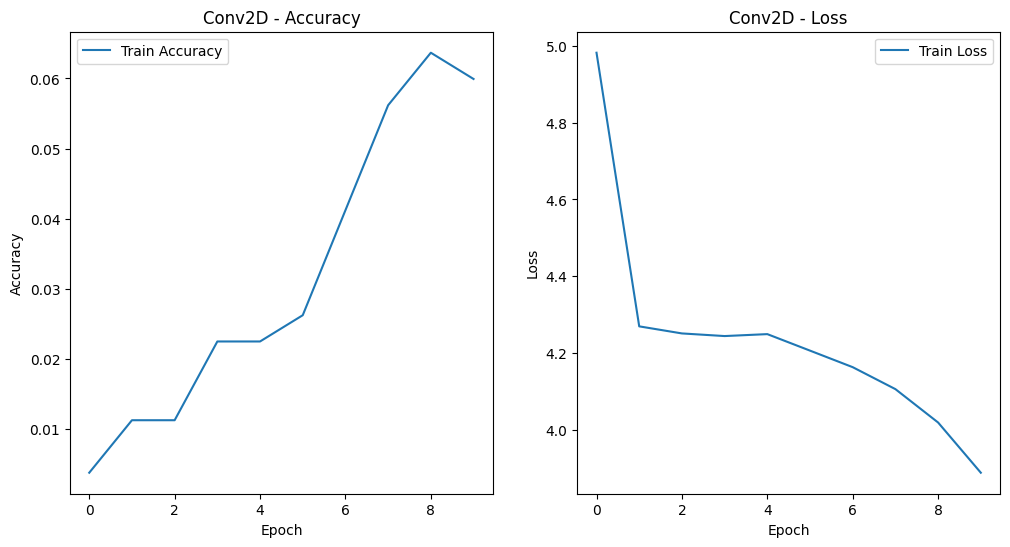

In [ ]:
# Visualisasi hasil pelatihan Conv2D
plt.figure(figsize=(12, 6))

# Plotting Akurasi Conv2D
plt.subplot(1, 2, 1)
plt.plot(conv2d_history.history['accuracy'], label='Train Accuracy')
plt.title('Conv2D - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss Conv2D
plt.subplot(1, 2, 2)
plt.plot(conv2d_history.history['loss'], label='Train Loss')
plt.title('Conv2D - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## INFERENCE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


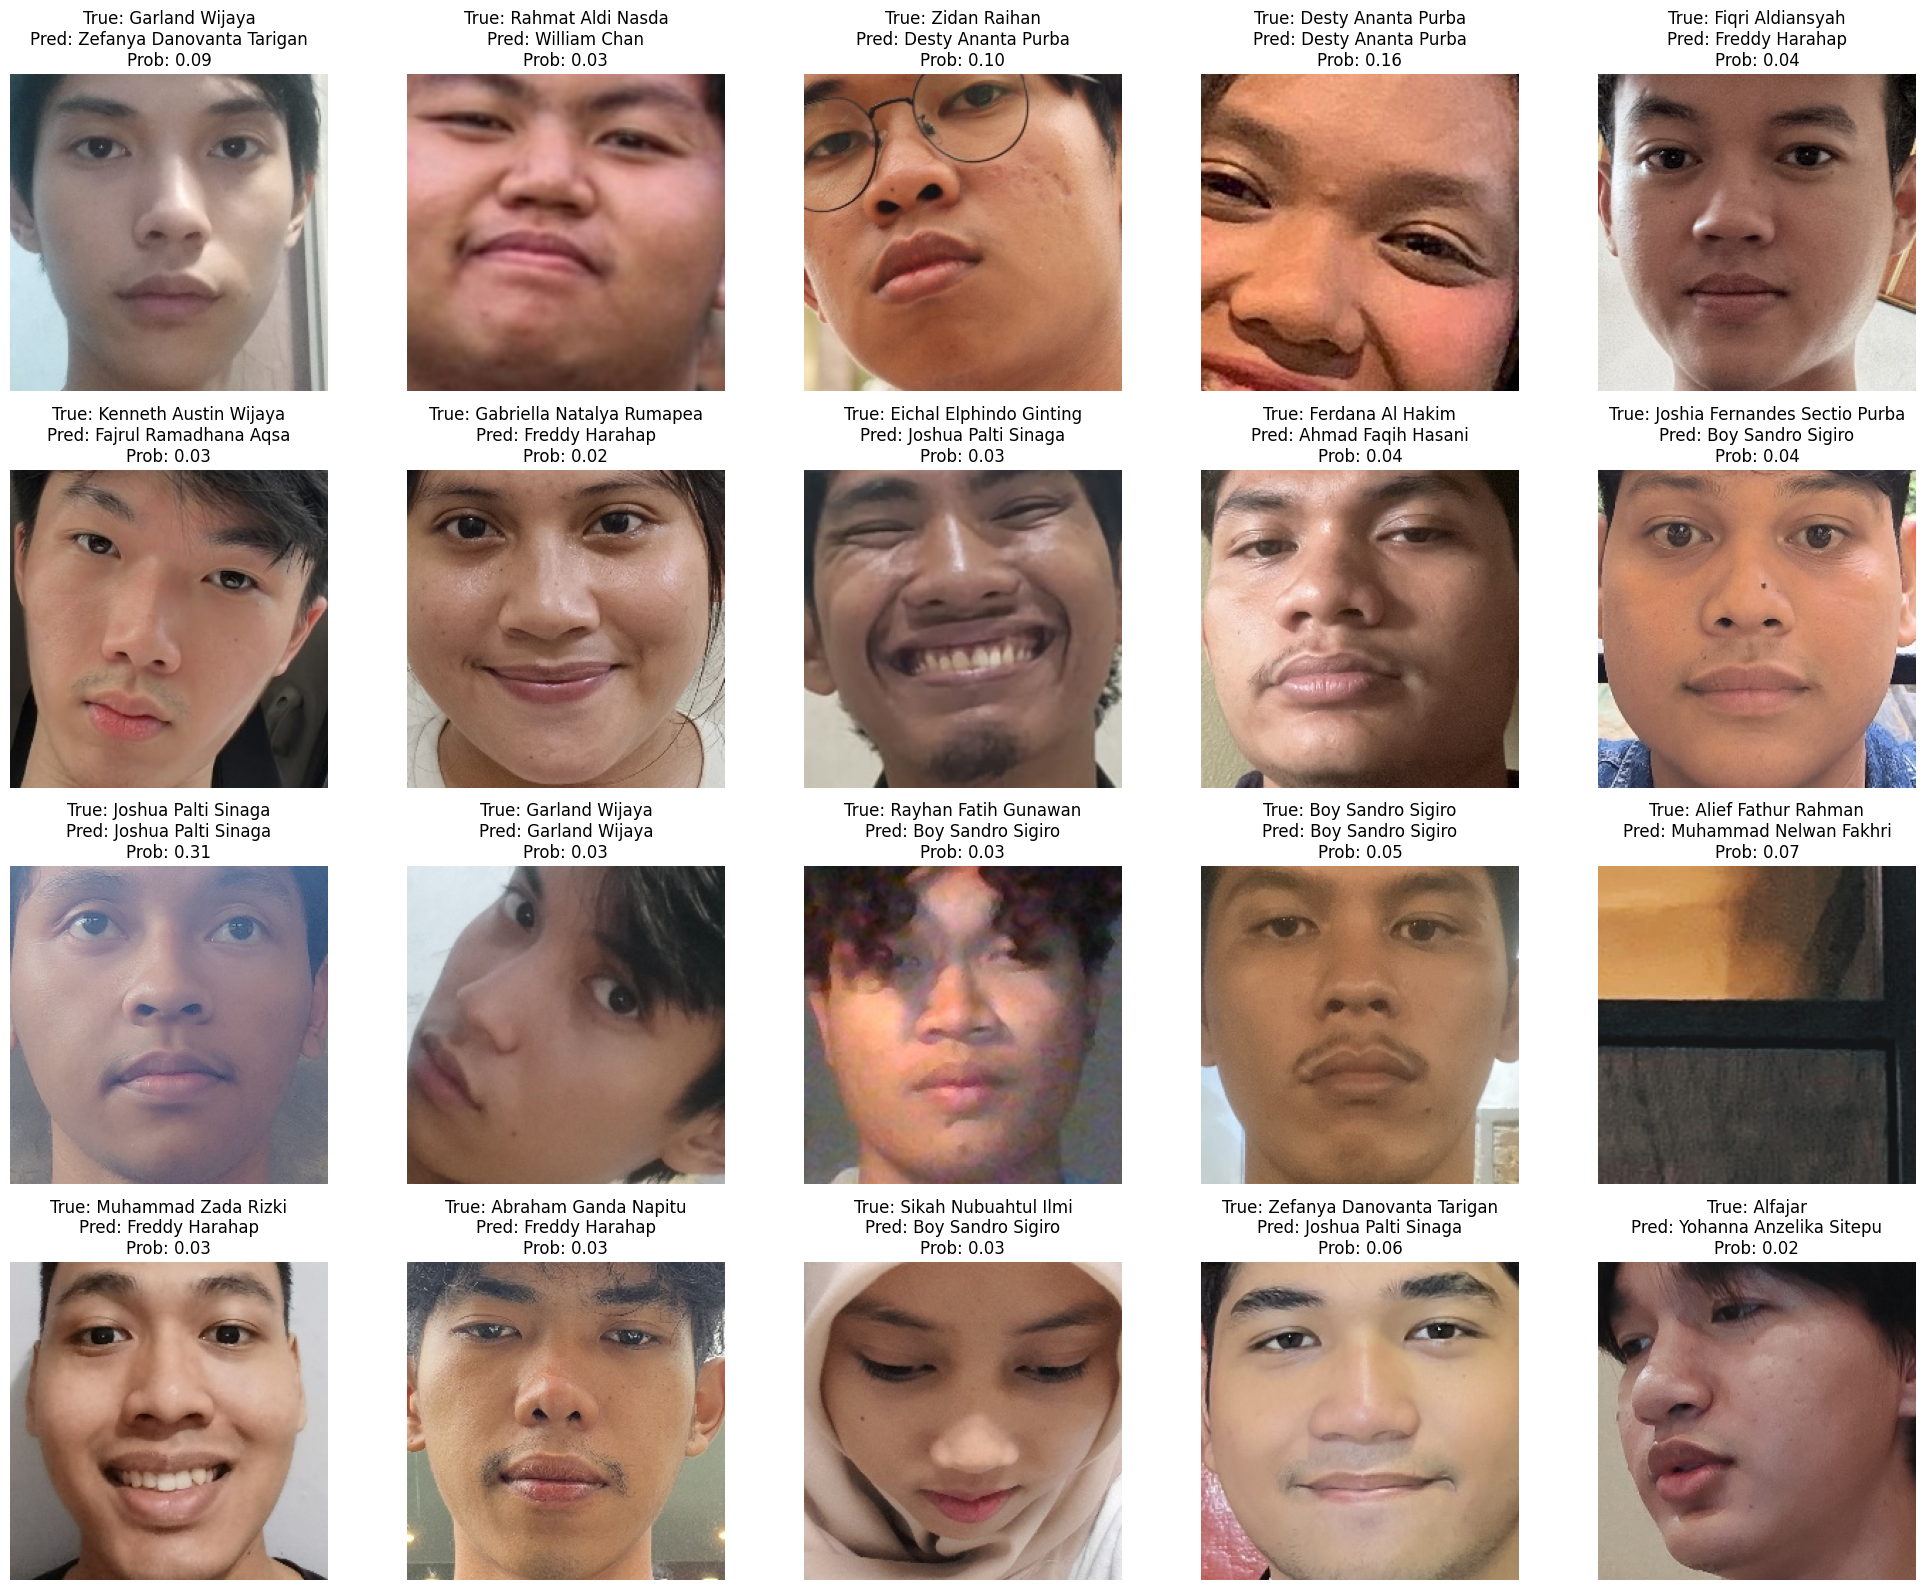

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from pathlib import Path

model = tf.keras.models.load_model('conv2d_final_model.h5')

# Fungsi untuk memuat model dan memprediksi gambar
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    return predicted_class_index, prediction[0][predicted_class_index]

# Dapatkan nama kelas berdasarkan indeks dari train_generator
class_names = {v: k for k, v in train_generator.class_indices.items()}  # Kembalikan indeks ke nama kelas

# Ambil 20 gambar secara acak
image_paths = random.sample(list(Path(PROC_TRAIN).glob('*/*')), 20)  # Ambil 20 gambar acak dari dataset
true_labels = [str(image_path).split(os.sep)[-2] for image_path in image_paths]  # Nama kelas sebenarnya

# Inisialisasi grid plot
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # Membuat grid 4x5 untuk 20 gambar
axes = axes.ravel()

# Tampilkan 20 gambar dengan label dan prediksi
for i, img_path in enumerate(image_paths):
    # Prediksi gambar
    predicted_class_index, probability = predict_image(str(img_path), model)
    predicted_class_name = class_names[predicted_class_index]
    
    # Ambil gambar asli untuk ditampilkan
    img = load_img(str(img_path), target_size=(224, 224))
    
    # Plot gambar
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"True: {true_labels[i]}\nPred: {predicted_class_name}\nProb: {probability:.2f}")

# Tampilkan grid
plt.tight_layout()
plt.show()
